In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# Customize plotting theme
custom_style = {'axes.axisbelow': True,
                'axes.edgecolor': 'white',
                'axes.facecolor': '#3C4053',
                'axes.facecolor':'#3C4053',
                'figure.facecolor':'#3C4053',
                'axes.grid': True,
                'axes.labelcolor': 'grey',
                'axes.linewidth': 0,
                'grid.color': 'grey',
                'grid.linestyle': '-',
                'image.cmap': 'Greys',
                'legend.frameon': False,
                'legend.numpoints': 1,
                'legend.scatterpoints': 1,
                'lines.solid_capstyle': 'round',
                'pdf.fonttype': 42,
                'text.color': 'white',
                'xtick.color': 'white',
                'xtick.direction': 'out',
                'xtick.major.size': 0,
                'xtick.minor.size': 0,
                'ytick.color': 'white',
                'ytick.direction': 'out',
                'ytick.major.size': 0,
                'ytick.minor.size': 0}

sns.set(font_scale=1.7, style='darkgrid', rc=custom_style)

In [117]:
scorecard = pd.read_csv('scorecard.csv')
earnings = pd.read_csv('post-school-earning.csv')
df =scorecard.merge(earnings, how='left', on=None, left_on=None, right_on=None,
                    left_index=False, right_index=False)

In [118]:
# Display more 
pd.options.display.max_rows = 7000

In [119]:
# Data cleaning
for col in df:
    df[col]  = df[col].apply(lambda x: np.nan if x == 'PrivacySuppressed' else x)
    try:
        df[col]  = df[col].apply(lambda x: float(x.strip()))
    except:
        pass

Number of students not working and not enrolled ... years after entry

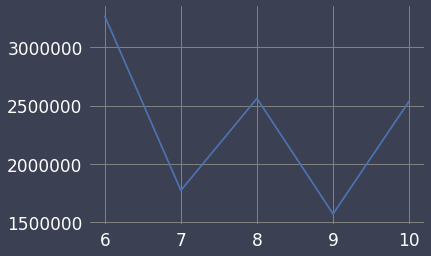

In [120]:
# Fill missing values with median value for that column
impute = Imputer(missing_values="NaN", strategy="median")

# NWNE: Number of students not working and not enrolled ... years after entry
cols = ['COUNT_NWNE_P6', 'COUNT_NWNE_P7', 'COUNT_NWNE_P8', 'COUNT_NWNE_P9', 'COUNT_NWNE_P10']
for col in cols:
    df[col] = impute.fit_transform(df[[col]])

X = [6, 7, 8, 9, 10]    # Year
y = []    # Total students not working
for col in cols:
    y.append(sum(df[col]))
plt.plot(X, y);

In [121]:
# Linear regression
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

/home/raven/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                 -0.136
Method:                 Least Squares   F-statistic:                    0.5201
Date:                Sun, 18 Mar 2018   Prob (F-statistic):              0.523
Time:                        14:33:14   Log-Likelihood:                -73.309
No. Observations:                   5   AIC:                             150.6
Df Residuals:                       3   BIC:                             149.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.67e+06   1.87e+06      1.962      0.145   -2.28e+06    9.62e+06
x1         -1.661e+05    2.3e+05     -0.721      0.523   -8.99e+05    5.67e+05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.927
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.703
Skew:                          -0.283   Prob(JB):                        0.704
Kurtosis:                       1.253   Cond. No.                         47.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Number of students working and not enrolled ... years after entry

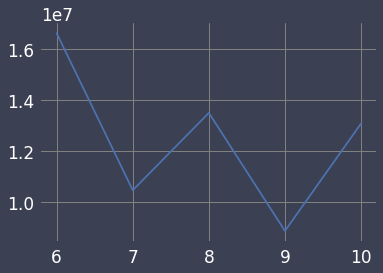

In [122]:
# Fill missing values with median value for that column
impute = Imputer(missing_values="NaN", strategy="median")

# NWNE: Number of students working and not enrolled ... years after entry
cols = ['COUNT_WNE_P6', 'COUNT_WNE_P7', 'COUNT_WNE_P8', 'COUNT_WNE_P9', 'COUNT_WNE_P10']
for col in cols:
    df[col] = impute.fit_transform(df[[col]])

X = [6, 7, 8, 9, 10]    # Year
y = []    # Total students not working
for col in cols:
    y.append(sum(df[col]))
plt.plot(X, y);

In [123]:
# Linear regression
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

/home/raven/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.8036
Date:                Sun, 18 Mar 2018   Prob (F-statistic):              0.436
Time:                        14:33:17   Log-Likelihood:                -80.504
No. Observations:                   5   AIC:                             165.0
Df Residuals:                       3   BIC:                             164.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.947e+07   7.89e+06      2.468      0.090   -5.63e+06    4.46e+07
x1         -8.704e+05   9.71e+05     -0.896      0.436   -3.96e+06    2.22e+06
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.957
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.733
Skew:                          -0.287   Prob(JB):                        0.693
Kurtosis:                       1.214   Cond. No.                         47.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""